In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as asplt
import seaborn as sns


In [2]:
df =pd.read_csv("E:\Customer churn Prediciton\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# 1. Force convert to numeric
# 'errors=coerce' tells Python: "If you find a blank space, turn it into a NaN (Not a Number) instead of crashing."
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. Check if we created any missing values (NaNs)
print("Missing values in TotalCharges:", df['TotalCharges'].isnull().sum())

Missing values in TotalCharges: 11


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.dropna(inplace = True)

In [8]:
# 2. Check the 'Churn' count (How many Yes vs No?)
print(df['Churn'].value_counts())

Churn
No     5163
Yes    1869
Name: count, dtype: int64


NameError: name 'plt' is not defined

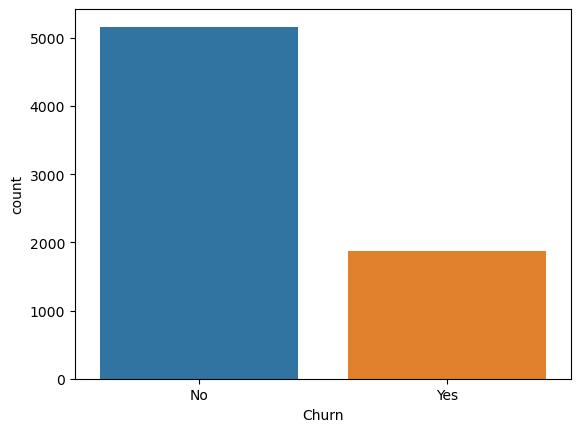

In [9]:
# 3. Visualize it (Optional, but looks good)
sns.countplot(x='Churn', data=df)
plt.title('Churn Count (Target Variable)')
plt.show()

In [ ]:
# No(Stayed): 5,163 (approx 73%)

# Yes(Left): 1,869 (approx 27%)

In [10]:
# 1. Convert the Target 'Churn' manually so we know 1 = Left
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 2. Convert all other text columns automatically
# drop_first=True is a pro move: it prevents redundancy (e.g., we don't need a 'Male' column AND a 'Female' column; if 'Male' is 0, we know they are Female).
df_final = pd.get_dummies(df, drop_first=True)

# 3. Check the result
print("New Data Shape:", df_final.shape)
df_final.head()


New Data Shape: (7032, 7062)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [11]:
# 1. Reload the data to start fresh (safest way)
df = pd.read_csv('E:\Customer churn Prediciton\WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2. Fix the TotalCharges issue again
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# 3. CRITICAL STEP: Drop the 'customerID' column
# We are deleting it because ID numbers don't predict churn
df.drop('customerID', axis=1, inplace=True)

# 4. Map the target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 5. NOW run get_dummies
df_final = pd.get_dummies(df, drop_first=True)

# 6. Check the shape again
print("Corrected Shape:", df_final.shape)

Corrected Shape: (7032, 31)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 1. Define X (Features) and Y (Target)
X = df_final.drop('Churn', axis=1)
Y = df_final['Churn']

# 2. Split into Training (80%) and Testing (20%)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=5)

# 3. Scale the Data (Only train on X_train to prevent cheating!)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (5625, 30)
Testing Data Shape: (1407, 30)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# 1. Initialize and Train
model = LogisticRegression()
model.fit(X_train, Y_train)

# 2. Predict on Test Data
prediction = model.predict(X_test)

# 3. Check Accuracy
score = accuracy_score(Y_test, prediction)
print(f"Accuracy: {score:.2%}")

# 4. Detailed Report (This is crucial for Churn)
print("\nClassification Report:\n")
print(classification_report(Y_test, prediction))

Accuracy: 79.39%

Classification Report:

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.68      0.56      0.61       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.74      1407
weighted avg       0.79      0.79      0.79      1407

